# **UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE**

## **INSTITUTO METRÓPOLE DIGITAL**

### **CIÊNCIA DE DADOS**

DOCENETE: DANIEL SABINO

DISCENTES: EDUARDA CHIESA E SIDNEY ALVES

## Importação das bibliotecas e carregamento da base de dados

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

### Formatando base de dados

Acessando os arquivos

In [2]:
diretorio = './Base_Dados'
arquivos = os.listdir(diretorio)
arquivos.sort()

print(f'Quantidade de arquivos: {len(arquivos)}')
print('Listagem dos arquivos:')

for arquivo in arquivos:
    print('\t', arquivo)

Quantidade de arquivos: 22
Listagem dos arquivos:
	 investimentos_cnpq_2002.csv
	 investimentos_cnpq_2003.csv
	 investimentos_cnpq_2004.csv
	 investimentos_cnpq_2005.csv
	 investimentos_cnpq_2006.csv
	 investimentos_cnpq_2007.csv
	 investimentos_cnpq_2008.csv
	 investimentos_cnpq_2009.csv
	 investimentos_cnpq_2010.csv
	 investimentos_cnpq_2011.csv
	 investimentos_cnpq_2012.csv
	 investimentos_cnpq_2013.csv
	 investimentos_cnpq_2014.csv
	 investimentos_cnpq_2015.csv
	 investimentos_cnpq_2016.csv
	 investimentos_cnpq_2017.csv
	 investimentos_cnpq_2018.csv
	 investimentos_cnpq_2019.csv
	 investimentos_cnpq_2020.csv
	 investimentos_cnpq_2021.csv
	 investimentos_cnpq_2022.csv
	 investimentos_cnpq_2023.csv


Carregando as bases de dados desde 2002 até 2018, pois ambas possuem o mesmo *encoding = 'latin-1'*

In [3]:
df = []
arquivos_2002_2018 = arquivos[:-5]

for arquivo in arquivos_2002_2018:

    header = None
    df_temp = []
    caminho = os.path.join(diretorio, arquivo)

    with open(caminho, 'r', encoding='latin-1') as f:
        data = csv.reader(f, delimiter=',')
        for i, linha in enumerate(data):
            if i == 0:
                header = linha
            else:
                df_temp.append(linha)
    
    df.append(pd.DataFrame(df_temp, columns=header))

In [4]:
for i, data in enumerate(df):
    print(f'Número de linhas x colunas do df de {2002+i}: {len(data)} x {len(data.columns)}')

Número de linhas x colunas do df de 2002: 21667 x 21
Número de linhas x colunas do df de 2003: 34520 x 21
Número de linhas x colunas do df de 2004: 42225 x 21
Número de linhas x colunas do df de 2005: 44634 x 21
Número de linhas x colunas do df de 2006: 48524 x 21
Número de linhas x colunas do df de 2007: 59214 x 21
Número de linhas x colunas do df de 2008: 94840 x 21
Número de linhas x colunas do df de 2009: 127633 x 21
Número de linhas x colunas do df de 2010: 157780 x 21
Número de linhas x colunas do df de 2011: 169064 x 21
Número de linhas x colunas do df de 2012: 182193 x 21
Número de linhas x colunas do df de 2013: 195332 x 21
Número de linhas x colunas do df de 2014: 207455 x 21
Número de linhas x colunas do df de 2015: 206491 x 21
Número de linhas x colunas do df de 2016: 171675 x 21
Número de linhas x colunas do df de 2017: 153539 x 21
Número de linhas x colunas do df de 2018: 155731 x 21


Carregando e formatando a base referente 2019. Essa base necessita concatenar *Valor Pago*, pois ao carregar e o separador é `,` ; assim o valor é separado em parte inteira e parte decimal, além de adicionar `,00` em valores não decimais

In [5]:
caminho = os.path.join(diretorio, arquivos[-5])
header = None
arquivo_2019 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f)
    for i,linha in enumerate(data):
        if i == 0:
            header = linha
        else:
            if len(linha) == 21:
                linha[-1] = float(linha[-1].replace(',', ''))
                arquivo_2019.append(linha)
            if len(linha) > 21:
                aux = float(linha[-2].replace(',', ''))
                linha[:] = linha[:-2]
                linha.append(aux)
                arquivo_2019.append(linha)

arquivo_2019 = pd.DataFrame(arquivo_2019, columns=header)
df.append(arquivo_2019)
del(arquivo_2019)

Carregando e formatando a base referente 2020. A base vem com uma coluna extra referente aos índices e o *Valor Pago* necessia adicionar `,00`

In [6]:
caminho = os.path.join(diretorio, arquivos[-4])
header = None
arquivo_2020 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i == 0:
            header = linha[1:]
        else:
            if len(linha) > 21:
                linha = linha[1:]
                linha[-1] = float(linha[-1].replace(',', ''))
            arquivo_2020.append(linha)

arquivo_2020 = pd.DataFrame(arquivo_2020, columns=header)
df.append(arquivo_2020)
del(arquivo_2020)

Carregando e formatando a base referente 2021. Corrigir a primeira coluna que está com caracteres, além de remover 10 colunas vazias

In [7]:
caminho = os.path.join(diretorio, arquivos[-3])
header = None
arquivo_2021 = []
with open(caminho, 'r', encoding='utf-8') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i == 0:
            linha[0] = 'Ano Referência'
            linha = linha[:-10]
            header = linha
        else:
            linha = linha[:-10]
            linha[-1] = float(linha[-1].replace('.', '').replace(',', '.'))
            arquivo_2021.append(linha)

arquivo_2021 = pd.DataFrame(arquivo_2021, columns=header)
df.append(arquivo_2021)
del(arquivo_2021)    

Carregando e formatando a base referente 2022. Foi necesário realizar split das colunas separando por `,`, remover caracteres adicionais e concatenar o `Valor Pago` que está separado em duas colunas

In [9]:
caminho = os.path.join(diretorio, arquivos[-2])
header = None
arquivo_2022 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i > 4:
            linha = linha[0].split(',')
            if i > 5:
                linha[-1] = linha[-1].replace('"', '')
                linha[-2] = linha[-2].replace('"', '')
                aux = linha[-2]
                linha = linha[:-2]
                linha.append(aux)
                linha[-1] = linha[-1][3:]
                linha[-1] = float(linha[-1])
            arquivo_2022.append(linha)
            if i >= 10:
                break

header = arquivo_2022[0]
arquivo_2022 = arquivo_2022[1:]
arquivo_2022 = pd.DataFrame(arquivo_2022, columns=header)
df.append(arquivo_2022)
del(arquivo_2022)

Carregando e formatando a base referente 2023. Remoção de caracteres desnecessários, assim como a remoção de colunas adicionais

In [11]:
caminho = os.path.join(diretorio, arquivos[-1])
header = None
arquivo_2023 = []
with open(caminho, 'r', encoding='utf-8') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i > 4:
            linha = linha[:27]
            if i == 5:
                header = linha
            if i > 5:
                linha[-1] = linha[-1][3:]
                linha[-1] = linha[-1].replace('.','')
                linha[-1] = float(linha[-1].replace(',', '.'))
                arquivo_2023.append(linha)

arquivo_2023 = pd.DataFrame(arquivo_2023, columns=header)
df.append(arquivo_2023)
del(arquivo_2023)

Criação do dataset como a concatenação das base de dados

In [12]:
dataset = pd.concat(df, axis=0, ignore_index=True)
del(df)

In [13]:
dataset.head()

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Categoria/Nível,Nome Chamada,Programa CNPq,Grande Área,Área,...,Região,Título do Projeto,Palavra Chave,UO,Programa PPA,Ação PPA,Natureza de Despesa,Data Início Processo,Data Término Processo,Região Destino
0,2002,130942/2000-6,Abad Oliveira Souza Júnior,Bolsas de Mestrado,GM - Mestrado,,,Programa Básico de Geociências: Geofísica e Ge...,Ciências Exatas e da Terra,Geociências,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,132920/2002-6,Abel Bemvenuti,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE BIOFISICA,Ciências Biológicas,Biofísica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,141578/2002-5,Abel Guilhermino da Silva Filho,Bolsas de Doutorado,GD - Doutorado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE CIENCIA DA COMPUTACAO,Ciências Exatas e da Terra,Ciência da Computação,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pré processamento dos dados

Verificando os tipos de dados no dataset.

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728155 entries, 0 to 2728154
Data columns (total 31 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Ano Referência             object
 1   Processo                   object
 2   Beneficiário               object
 3   Linha de Fomento           object
 4   Modalidade                 object
 5   Categoria/Nível            object
 6   Nome Chamada               object
 7   Programa CNPq              object
 8   Grande Área                object
 9   Área                       object
 10  Subárea                    object
 11  Instituição Origem         object
 12  Sigla UF Origem            object
 13  País Origem                object
 14  Instituição Destino        object
 15  Sigla Instituição Destino  object
 16  Sigla Instituição Macro    object
 17  Cidade Destino             object
 18  Sigla UF Destino           object
 19  País Destino               object
 20  Valor Pago              

Verificando todas as colunas existentes do dataset

In [15]:
dataset.columns

Index(['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento',
       'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq',
       'Grande Área', 'Área', 'Subárea', 'Instituição Origem',
       'Sigla UF Origem', 'País Origem', 'Instituição Destino',
       'Sigla Instituição Destino', 'Sigla Instituição Macro',
       'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago',
       'Região', 'Título do Projeto', 'Palavra Chave', 'UO', 'Programa PPA',
       'Ação PPA', 'Natureza de Despesa', 'Data Início Processo',
       'Data Término Processo', 'Região Destino'],
      dtype='object')

Mantendo as colunas em comum entre as base de dados

In [16]:
lista_interesse = ['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento', 'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq', 'Grande Área', 'Área', 'Subárea', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'Instituição Destino', 'Sigla Instituição Destino', 'Sigla Instituição Macro', 'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago']

In [17]:
col_exist = [coluna for coluna in lista_interesse if coluna in dataset.columns]
print(col_exist)

['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento', 'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq', 'Grande Área', 'Área', 'Subárea', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'Instituição Destino', 'Sigla Instituição Destino', 'Sigla Instituição Macro', 'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago']


In [18]:
dataset = dataset[col_exist]
dataset.head()

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Categoria/Nível,Nome Chamada,Programa CNPq,Grande Área,Área,...,Instituição Origem,Sigla UF Origem,País Origem,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,País Destino,Valor Pago
0,2002,130942/2000-6,Abad Oliveira Souza Júnior,Bolsas de Mestrado,GM - Mestrado,,,Programa Básico de Geociências: Geofísica e Ge...,Ciências Exatas e da Terra,Geociências,...,,,-,Universidade de São Paulo,USP,USP,São Paulo,SP,BRA - Brasil,"1449,04"
1,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,,,-,Universidade Federal Rural de Pernambuco,UFRPE,UFRPE,Recife,PE,BRA - Brasil,"7245,2"
2,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,,,-,Universidade Federal Rural de Pernambuco,UFRPE,UFRPE,Recife,PE,BRA - Brasil,"1449,04"
3,2002,132920/2002-6,Abel Bemvenuti,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE BIOFISICA,Ciências Biológicas,Biofísica,...,,,-,Universidade Federal do Rio de Janeiro,UFRJ,UFRJ,Rio de Janeiro,RJ,BRA - Brasil,"3622,6"
4,2002,141578/2002-5,Abel Guilhermino da Silva Filho,Bolsas de Doutorado,GD - Doutorado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE CIENCIA DA COMPUTACAO,Ciências Exatas e da Terra,Ciência da Computação,...,,,-,Universidade Federal de Pernambuco,UFPE,UFPE,Recife,PE,BRA - Brasil,"5364,45"


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728155 entries, 0 to 2728154
Data columns (total 21 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Ano Referência             object
 1   Processo                   object
 2   Beneficiário               object
 3   Linha de Fomento           object
 4   Modalidade                 object
 5   Categoria/Nível            object
 6   Nome Chamada               object
 7   Programa CNPq              object
 8   Grande Área                object
 9   Área                       object
 10  Subárea                    object
 11  Instituição Origem         object
 12  Sigla UF Origem            object
 13  País Origem                object
 14  Instituição Destino        object
 15  Sigla Instituição Destino  object
 16  Sigla Instituição Macro    object
 17  Cidade Destino             object
 18  Sigla UF Destino           object
 19  País Destino               object
 20  Valor Pago              

*Modalidade* e *Categoria/Nível* trazem a mesma informação em relação as bolsa. O interessão é voltado para as instituições que foram beneficiadas (destino) podendo remover informações da *Origem*. Além disso, o interesse são as bolsas ofertadas no **Brasil**.

Referência: [Tabela de Valores de Bolsas no País](https://www.gov.br/cnpq/pt-br/acesso-a-informacao/bolsas-e-auxilios/copy_of_modalidades/tabela-de-valores-no-pais)

In [20]:
dataset['País Destino'].value_counts()

País Destino
BRA - Brasil                 2626886
ING - Inglaterra               16459
 -                             12327
AUS - Austrália                11614
CAN - Canadá                   11013
                              ...   
RCA - Rep.Centro-Africana          1
RS - Sérvia                        1
QUE - Quênia                       1
BOL - Bolívia                      1
MLT - Malta                        1
Name: count, Length: 81, dtype: int64

In [21]:
dataset = dataset[dataset['País Destino'] == 'BRA - Brasil']
dataset = dataset.drop(columns=['Categoria/Nível', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'País Destino'])

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626886 entries, 0 to 2728154
Data columns (total 16 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Ano Referência             object
 1   Processo                   object
 2   Beneficiário               object
 3   Linha de Fomento           object
 4   Modalidade                 object
 5   Nome Chamada               object
 6   Programa CNPq              object
 7   Grande Área                object
 8   Área                       object
 9   Subárea                    object
 10  Instituição Destino        object
 11  Sigla Instituição Destino  object
 12  Sigla Instituição Macro    object
 13  Cidade Destino             object
 14  Sigla UF Destino           object
 15  Valor Pago                 object
dtypes: object(16)
memory usage: 340.7+ MB


Formatando *Ano Referência* e *Valor Pago* para valores numéricos.

In [28]:
dataset['Ano Referência'] = dataset['Ano Referência'].replace('', None)
dataset['Ano Referência'] = dataset['Ano Referência'].dropna()
dataset['Ano Referência'] = dataset['Ano Referência'].astype(float)

dataset['Valor Pago'] = dataset['Valor Pago'].str.replace(',', '.', regex=False)
dataset['Valor Pago'] = dataset['Valor Pago'].astype(float)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626886 entries, 0 to 2728154
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             float64
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(2), object(14)
memory usage: 340.7+ MB


Para os valores numéricos, iremos observar a sua distribuição.

In [30]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.626885e+06,1.974673e+06
mean,2.014342e+03,9.569219e+03
std,5.133148e+00,3.467966e+04
min,2.060000e+02,-2.415100e+02
25%,2.011000e+03,1.800000e+03
50%,2.014000e+03,2.800000e+03
75%,2.018000e+03,1.217040e+04
max,2.023000e+03,1.296662e+07


Observando o *Ano Referência*.

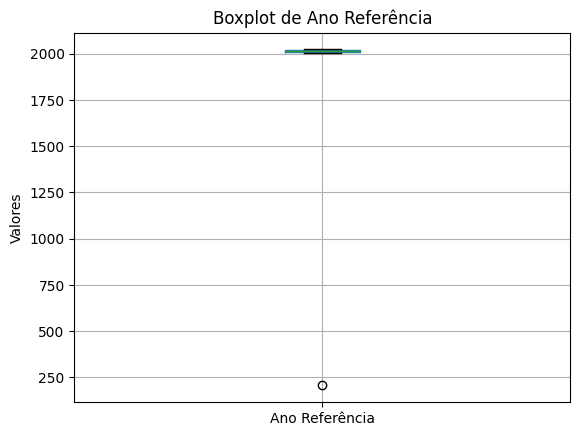

In [32]:
dataset[['Ano Referência']].boxplot()

plt.title('Boxplot de Ano Referência')
plt.ylabel('Valores')
plt.show()

É observado que há outliers em relação ao Ano Referência, é interessante verificar esses dados, 
pois durante a coleta pode ocorrer do preenchimento do ano ter sido com a falta de um caractere.

In [35]:
dataset[dataset['Ano Referência'] < 250]

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Nome Chamada,Programa CNPq,Grande Área,Área,Subárea,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,Valor Pago
170521,206.0,470276/2006-1,Lin Chau Ming,Apoio a Projetos de Pesquisas,APQ - Auxílio a Pesquisa,Edital MCT/CNPq 02/2006 - Universal,PROGRAMA BASICO DE BOTANICA,Ciências Biológicas,Botânica,Botânica Aplicada,Departamento de Horticultura,UNESP/BOTUCATU,UNESP,Botucatu,SP,6300.0


Como observado, foi um erro de preenchimento do campo e como há apenas um único registro remover não irá afetar a quantidade de registros da base de dados. Assim como não há esforço para corrigir, logo o registro será mantido para preservar a base de dados.

In [36]:
dataset[dataset['Ano Referência'] == 206.0] = 2006.0

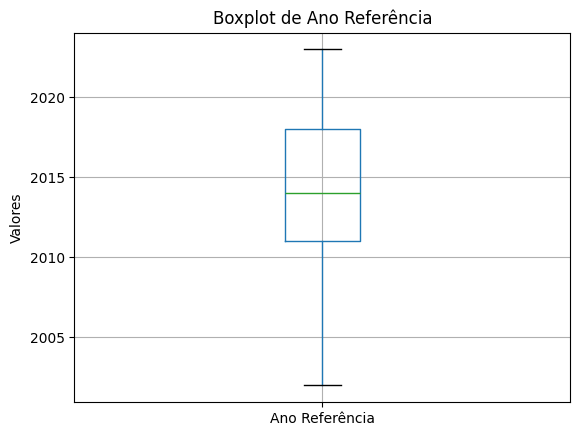

In [37]:
dataset[['Ano Referência']].boxplot()

plt.title('Boxplot de Ano Referência')
plt.ylabel('Valores')
plt.show()

Observando o *Valor Pago*.

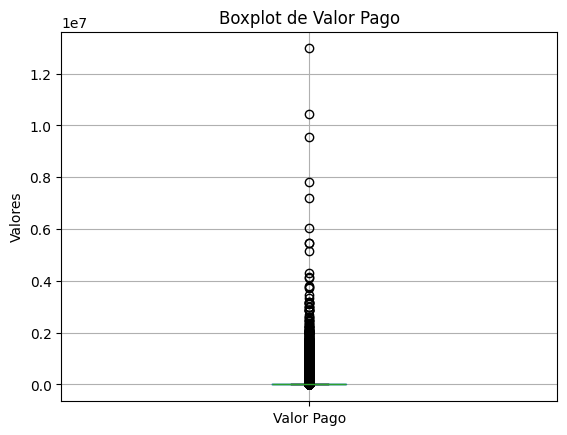

In [38]:
dataset[['Valor Pago']].boxplot()

plt.title('Boxplot de Valor Pago')
plt.ylabel('Valores')
plt.show()

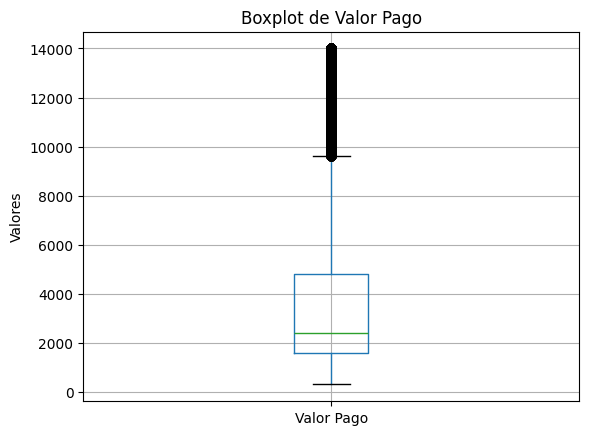

In [59]:
t = dataset.copy()
t = t[t['Valor Pago'] >= 300.0]
t = t[t['Valor Pago'] <= 14000.0]

t[['Valor Pago']].boxplot()

plt.title('Boxplot de Valor Pago')
plt.ylabel('Valores')
plt.show()

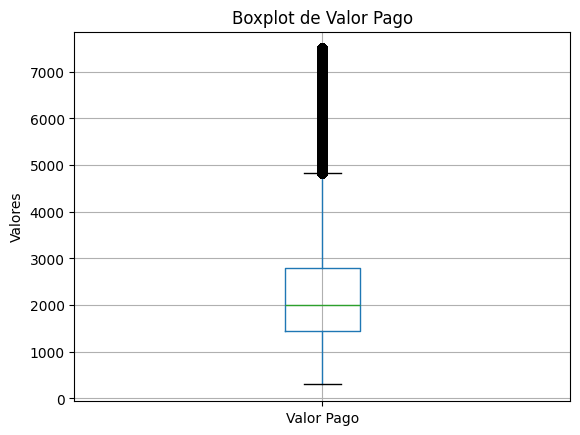

In [60]:
t = t[t['Valor Pago'] <= 7500.0]

t[['Valor Pago']].boxplot()

plt.title('Boxplot de Valor Pago')
plt.ylabel('Valores')
plt.show()

In [61]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263142 entries, 0 to 2072512
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Ano Referência             1263142 non-null  float64
 1   Processo                   1263142 non-null  object 
 2   Beneficiário               1263142 non-null  object 
 3   Linha de Fomento           1263142 non-null  object 
 4   Modalidade                 1263142 non-null  object 
 5   Nome Chamada               1263142 non-null  object 
 6   Programa CNPq              1263142 non-null  object 
 7   Grande Área                1263142 non-null  object 
 8   Área                       1263142 non-null  object 
 9   Subárea                    1263142 non-null  object 
 10  Instituição Destino        1263142 non-null  object 
 11  Sigla Instituição Destino  1263142 non-null  object 
 12  Sigla Instituição Macro    1263142 non-null  object 
 13  Cidade Destino   